# University of Cincinnati vs University of Maryland

## Introduction

Over the past three years I have studied at the University of Cincinnati. In may I will graduate with a bachelor's degree in Information Systems. I am currently looking at graduate schools. The University of Cincinnati serves the people of Ohio, the nation, and the world as a premier, public, urban research university dedicated to undergraduate, graduate, and professional education, experience-based learning, and research. The University of Maryland, College Park is the state's flagship university and one of the nation's preeminent public research universities. A global leader in research, entrepreneurship and innovation, the university is home to more than 41,000 students, 14,000 faculty and staff, and 388,000 alumni all dedicated to the pursuit of Fearless Ideas.

As I approach the end of my undergraduate experience, I need to choose which college is best for me. These factors include: acceptance rate, highest paying jobs, majors awarded, other student expenses (room and board), average time of completion, tuition costs, and venues around campus.

## Data

Based on our problem, certain factors that we will look for include:
- Acceptance Rate
- Highest Paying Jobs by Major
- Majors Awarded
- Other Student Expenses
- Time to Complete
- Tuition Costs
- Venues Around Campus

We decided to use regularuly spaced grids, around the center of the cities to define neighborhoods and boroughs.

The data sources used to extract and generate the required information are:
- University of Cincinnati data is scraped from: https://datausa.io/profile/university/university-of-cincinnati-main-campus
- University of Maryland data is scraped from: https://datausa.io/profile/university/university-of-maryland-college-park
- Foursquare' API is used to find all of the venues in the area

In [864]:
import numpy as np
import pandas as pd
import json
!conda install -c conda-forge geopy
from geopy.geocoders import Nominatim
import requests
from pandas.io.json import json_normalize
import matplotlib.cm as cm
import matplotlib.colors as color
from sklearn.cluster import KMeans
!conda install -c conda-forge folium=0.5.0 --yes
import folium
from bs4 import BeautifulSoup

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.



In [865]:
address_uc = 'University of Cincinnati, Cincinnati, OH'
geolocator = Nominatim(user_agent = 'UC')
location_uc = geolocator.geocode(address_uc)
latitude_uc = location_uc.latitude
longitude_uc = location_uc.longitude
print('The geograpical coordinates of {} are ({}, {}).'.format(address_uc, latitude_uc, longitude_uc))

The geograpical coordinates of University of Cincinnati, Cincinnati, OH are (39.1318525, -84.5157620959388).


In [866]:
UCMap = folium.Map(location = [latitude, longitude], zoom_start = 10)
UCMap

In [867]:
ar_uc = pd.read_csv('Acceptance Rate 1.csv')
arcolumn = ['University', 'Year', 'Acceptance Rate']
ar_uc['Acceptance Rate'] = (ar_uc['Acceptance Rate'] * 100).round(2)

arDF_uc = pd.DataFrame(data = ar_uc, columns=arcolumn)
arDF_uc = arDF_uc.loc[arDF_uc['University'] == 'University of Cincinnati-Main Campus']
arDF_uc = arDF_uc.loc[arDF_uc['Year'] == 2017]
arDF_uc

,University,Year,Acceptance Rate
6,University of Cincinnati-Main Campus,2017,76.49


In [868]:
ose_uc = pd.read_csv('Other Student Expenses 1.csv')
ose_uc
osecolumn = ['University', 'Year', 'Median Room And Board', 'Median Other Student Expenses', 'title', 'Total'] 
ose_uc['Total'] = (ose_uc['Median Room And Board'] + ose_uc['Median Other Student Expenses'])
oseDF_uc = pd.DataFrame(data = ose_uc, columns=osecolumn)
oseDF_uc = oseDF_uc.loc[oseDF_uc['University'] == 'University of Cincinnati-Main Campus']
oseDF_uc = oseDF_uc.loc[oseDF_uc['Year'] == 2017]
oseDF_uc = oseDF_uc.drop_duplicates(subset = 'Year')
oseDF_uc

,University,Year,Median Room And Board,Median Other Student Expenses,title,Total
12,University of Cincinnati-Main Campus,2017,11909.0,4538,Books And Supplies,16447.0


In [869]:
ttc_uc = pd.read_csv('Time to Complete 1.csv')
ttc_uc
ttccolumn = ['University', 'Year', 'Timeframe', 'Median Percent Completed BA'] 

ttcDF_uc = pd.DataFrame(data = ttc_uc, columns=ttccolumn)
ttcDF_uc = ttcDF_uc.loc[ttcDF_uc['University'] == 'University of Cincinnati-Main Campus']
ttcDF_uc = ttcDF_uc.loc[ttcDF_uc['Year'] == 2017]
ttcDF_uc = ttcDF_uc.drop_duplicates(subset = 'Year')
ttcDF_uc

,University,Year,Timeframe,Median Percent Completed BA
6,University of Cincinnati-Main Campus,2017,100%,28.0


In [870]:
tc_uc = pd.read_csv('Tuition Costs 1.csv')
tc_uc
tccolumn = ['University', 'Year', 'State Tuition'] 

tcDF_uc = pd.DataFrame(data = tc_uc, columns=tccolumn)
tcDF_uc = tcDF_uc.loc[tcDF_uc['University'] == 'University of Cincinnati-Main Campus']
tcDF_uc = tcDF_uc.loc[tcDF_uc['Year'] == 2017]
tcDF_uc

,University,Year,State Tuition
6,University of Cincinnati-Main Campus,2017,9322.0


In [871]:
frames_uc = [arDF_uc, oseDF_uc, ttcDF_uc, tcDF_uc]
university = arDF_uc[arDF_uc['University'] == 'University of Cincinnati-Main Campus']
innermerge_uc = pd.merge(arDF_uc, oseDF_uc, how = 'inner', on=['University', 'Year'])
innermerge_uc = pd.merge(innermerge_uc, ttcDF_uc, how = 'inner', on=['University', 'Year'])
innermerge_uc = pd.merge(innermerge_uc, tcDF_uc, how = 'inner', on=['University', 'Year'])
innermerge_uc['Total'] = (innermerge_uc['Median Room And Board'] + innermerge_uc['Median Other Student Expenses'] + innermerge_uc['State Tuition'])
innermerge_uc = pd.DataFrame(innermerge_uc)
innermerge_uc

,University,Year,Acceptance Rate,Median Room And Board,Median Other Student Expenses,title,Total,Timeframe,Median Percent Completed BA,State Tuition
0,University of Cincinnati-Main Campus,2017,76.49,11909.0,4538,Books And Supplies,25769.0,100%,28.0,9322.0


In [872]:
address_umd = 'University of Maryland, College Park, MD'
geolocator = Nominatim(user_agent = 'UMD')
location_umd = geolocator.geocode(address_umd)
latitude_umd = location_umd.latitude
longitude_umd = location_umd.longitude
print('The geograpical coordinates of {} are ({}, {}).'.format(address_umd, latitude_umd, longitude_umd))

The geograpical coordinates of University of Maryland, College Park, MD are (38.99203005, -76.94610290199051).


In [873]:
UMDMap = folium.Map(location = [latitude, longitude], zoom_start = 10)
UMDMap

In [874]:
ar_umd = pd.read_csv('Acceptance Rate.csv')
arcolumn = ['University', 'Year', 'Acceptance Rate'] 
ar_umd['Acceptance Rate'] = (ar_umd['Acceptance Rate'] * 100).round(2)
arDF_umd = pd.DataFrame(data = ar_umd, columns=arcolumn)
arDF_umd = arDF_umd.loc[arDF_umd['University'] == 'University of Maryland-College Park']
arDF_umd = arDF_umd.loc[arDF_umd['Year'] == 2017]
arDF_umd

,University,Year,Acceptance Rate
3,University of Maryland-College Park,2017,44.5


In [875]:
ose_umd = pd.read_csv('Other Student Expenses.csv')
ose_umd
osecolumn = ['University', 'Year', 'Median Room And Board', 'Median Other Student Expenses', 'title', 'Total'] 
ose_umd['Total'] = (ose_umd['Median Room And Board'] + ose_umd['Median Other Student Expenses']) 

oseDF_umd = pd.DataFrame(data = ose_umd, columns=osecolumn)
oseDF_umd = oseDF_umd.loc[oseDF_umd['University'] == 'University of Maryland-College Park']
oseDF_umd = oseDF_umd.loc[oseDF_umd['Year'] == 2017]
oseDF_umd = oseDF_umd.drop_duplicates(subset = 'Year')
oseDF_umd

,University,Year,Median Room And Board,Median Other Student Expenses,title,Total
3,University of Maryland-College Park,2017,13022.0,3932,Books And Supplies,16954.0


In [876]:
ttc_umd = pd.read_csv('Time to Complete.csv')
ttc_umd
ttccolumn = ['University', 'Year', 'Timeframe', 'Median Percent Completed BA'] 
ttcDF_umd = pd.DataFrame(data = ttc_umd, columns=ttccolumn)
ttcDF_umd = ttcDF_umd.loc[ttcDF_umd['University'] == 'University of Maryland-College Park']
ttcDF_umd = ttcDF_umd.loc[ttcDF_umd['Year'] == 2017]
ttcDF_umd = ttcDF_umd.drop_duplicates(subset = 'Year')
ttcDF_umd

,University,Year,Timeframe,Median Percent Completed BA
6,University of Maryland-College Park,2017,100%,69.0


In [877]:
tc_umd = pd.read_csv('Tuition Costs.csv')
tc_umd
tccolumn = ['University', 'Year', 'State Tuition'] 

tcDF_umd = pd.DataFrame(data = tc_umd, columns=tccolumn)
tcDF_umd = tcDF_umd.loc[tcDF_umd['University'] == 'University of Maryland-College Park']
tcDF_umd = tcDF_umd.loc[tcDF_umd['Year'] == 2017]
tcDF_umd

,University,Year,State Tuition
3,University of Maryland-College Park,2017,8481.0


In [1059]:
innermerge_umd = pd.merge(arDF_umd, oseDF_umd, how = 'inner', on=['University', 'Year'])
innermerge_umd = pd.merge(innermerge_umd, ttcDF_umd, how = 'inner', on=['University', 'Year'])
innermerge_umd = pd.merge(innermerge_umd, tcDF_umd, how = 'inner', on=['University', 'Year'])
innermerge_umd = innermerge_umd.drop_duplicates(subset = 'Year')
innermerge_umd = pd.DataFrame(innermerge_umd)
innermerge_umd['Total'] = (innermerge_umd['Median Room And Board'] + innermerge_umd['Median Other Student Expenses'] + innermerge_umd['State Tuition'])
innermerge_umd

,University,Year,Acceptance Rate,Median Room And Board,Median Other Student Expenses,title,Total,Timeframe,Median Percent Completed BA,State Tuition
0,University of Maryland-College Park,2017,44.5,13022.0,3932,Books And Supplies,25435.0,100%,69.0,8481.0


## Foursquare API

In [879]:
CLIENT_ID = 'RN530BC0LUAPUIO15YIWGNE0NKN3OWUM4CE4EF5YAL1PKGK2' # your Foursquare ID
CLIENT_SECRET = 'PEFFPSDRAKNQNDMRXK5HGWUHVDFEAWTL5P4AOM11SZTMVMOO' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: RN530BC0LUAPUIO15YIWGNE0NKN3OWUM4CE4EF5YAL1PKGK2
CLIENT_SECRET:PEFFPSDRAKNQNDMRXK5HGWUHVDFEAWTL5P4AOM11SZTMVMOO


In [880]:
radius = 500
LIMIT = 100
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude_uc, 
    longitude_uc, 
    radius, 
    LIMIT)

In [881]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '6004b5465d7adf267bd31a8c'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': '$-$$$$', 'key': 'price'},
    {'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'CUF',
  'headerFullLocation': 'CUF, Cincinnati',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 60,
  'suggestedBounds': {'ne': {'lat': 39.1363525045, 'lng': -84.50997167758035},
   'sw': {'lat': 39.1273524955, 'lng': -84.52155251429724}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b47a4cef964a520c43826e3',
       'name': 'UC College-Conservatory of Music',
       'location': {'address': '290 CCM Blvd',
        'crossStreet': 'at University of Cincinnati',
        'lat': 39.12962746958196,
        'lng': -84

In [882]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [883]:
ucvenues = results['response']['groups'][0]['items']
    
ucvenues = json_normalize(ucvenues) # flatten JSON

# filter columns
filtered_columns = ['venue.location.city', 'venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
ucvenues =ucvenues.loc[:, filtered_columns]

# filter the category for each row
ucvenues['venue.categories'] = ucvenues.apply(get_category_type, axis=1)

# clean columns
ucvenues.columns = [col.split(".")[-1] for col in ucvenues.columns]

ucvenues

<ipython-input-883-209f2b255e41>:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  ucvenues = json_normalize(ucvenues) # flatten JSON


,city,name,categories,lat,lng
0,Cincinnati,UC College-Conservatory of Music,College Arts Building,39.129627,-84.517736
1,Cincinnati,BIBIBOP Asian Grill,Asian Restaurant,39.128441,-84.516380
2,Cincinnati,Catskeller,Bar,39.131769,-84.517261
3,Cincinnati,Yoga Alive Clifton,Yoga Studio,39.128359,-84.515539
4,Cincinnati,Marge Schott Stadium,College Baseball Diamond,39.129708,-84.513286
5,Cincinnati,Raising Cane's Chicken Fingers,Fried Chicken Joint,39.128126,-84.516878
6,Cincinnati,Keystone Bar & Grill Clifton,Restaurant,39.128385,-84.517027
7,Cincinnati,Adriatico's New York Style,Pizza Place,39.127732,-84.516552
8,Cincinnati,The Brass Tap,Bar,39.128390,-84.517276
9,Cincinnati,Panera Bread,Bakery,39.128311,-84.514066


In [884]:
ucvenues = ucvenues.rename(columns = {'city': 'City', 'name': 'Name', 'categories': 'Categories', 'lat': 'Latitude', 'lng': 'Longitude'})

In [885]:
print('There are {} venues near UC that were returned by Foursquare.'.format(ucvenues.shape[0]))

There are 60 venues near UC that were returned by Foursquare.


In [886]:
print(ucvenues.shape)
ucvenues.head()

(60, 5)


,City,Name,Categories,Latitude,Longitude
0,Cincinnati,UC College-Conservatory of Music,College Arts Building,39.129627,-84.517736
1,Cincinnati,BIBIBOP Asian Grill,Asian Restaurant,39.128441,-84.516380
2,Cincinnati,Catskeller,Bar,39.131769,-84.517261
3,Cincinnati,Yoga Alive Clifton,Yoga Studio,39.128359,-84.515539
4,Cincinnati,Marge Schott Stadium,College Baseball Diamond,39.129708,-84.513286


In [887]:
radius = 500
LIMIT = 100
urlumd = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude_umd, 
    longitude_umd, 
    radius, 
    LIMIT)

In [888]:
results = requests.get(urlumd).json()
results

{'meta': {'code': 200, 'requestId': '6004b54618aab40723053c98'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'College Park',
  'headerFullLocation': 'College Park',
  'headerLocationGranularity': 'city',
  'totalResults': 23,
  'suggestedBounds': {'ne': {'lat': 38.9965300545, 'lng': -76.94032394043806},
   'sw': {'lat': 38.987530045499994, 'lng': -76.95188186354297}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4d52bdb5bd6ff04d5f2aff0c',
       'name': 'Eppley Recreation Center Gym',
       'location': {'address': '1115 Eppley Recreation Center',
        'lat': 38.99348917051481,
        'lng': -76.94499050326961,
        'labeledLatLngs': [{'label': 'display',
          'la

In [889]:
umdvenues = results['response']['groups'][0]['items']
    
umdvenues = json_normalize(umdvenues) # flatten JSON

# filter columns
filtered_columns = ['venue.location.city', 'venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
umdvenues = umdvenues.loc[:, filtered_columns]

# filter the category for each row
umdvenues['venue.categories'] = umdvenues.apply(get_category_type, axis=1)

# clean columns
umdvenues.columns = [col.split(".")[-1] for col in umdvenues.columns]

umdvenues

<ipython-input-889-42dff87bf8b3>:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  umdvenues = json_normalize(umdvenues) # flatten JSON


,city,name,categories,lat,lng
0,College Park,Eppley Recreation Center Gym,Gym,38.993489,-76.944991
1,College Park,Eppley Recreation Center Natatorium,Gym / Fitness Center,38.993421,-76.944778
2,College Park,The Clarice Smith Performing Arts Center,Performing Arts Venue,38.990816,-76.949810
3,College Park,Adele H Stamp Student Union,Student Center,38.988073,-76.944814
4,College Park,Maryland Food Collective,Grocery Store,38.988504,-76.944706
5,College Park,Barnes & Noble,Bookstore,38.987936,-76.944887
6,College Park,Chick-fil-A,Fast Food Restaurant,38.988141,-76.944981
7,College Park,Jim Henson Statue,Sculpture Garden,38.987651,-76.945024
8,College Park,Panda Express,Chinese Restaurant,38.988000,-76.944845
9,College Park,Coffee Bar - University of Maryland,Coffee Shop,38.987794,-76.944451


In [890]:
ucvenues.rename(columns = {'city': 'City', 'name': 'Name', 'categories': 'Categories', 'lat': 'Latitude', 'lng': 'Longitude'})

,City,Name,Categories,Latitude,Longitude
0,Cincinnati,UC College-Conservatory of Music,College Arts Building,39.129627,-84.517736
1,Cincinnati,BIBIBOP Asian Grill,Asian Restaurant,39.128441,-84.516380
2,Cincinnati,Catskeller,Bar,39.131769,-84.517261
3,Cincinnati,Yoga Alive Clifton,Yoga Studio,39.128359,-84.515539
4,Cincinnati,Marge Schott Stadium,College Baseball Diamond,39.129708,-84.513286
5,Cincinnati,Raising Cane's Chicken Fingers,Fried Chicken Joint,39.128126,-84.516878
6,Cincinnati,Keystone Bar & Grill Clifton,Restaurant,39.128385,-84.517027
7,Cincinnati,Adriatico's New York Style,Pizza Place,39.127732,-84.516552
8,Cincinnati,The Brass Tap,Bar,39.128390,-84.517276
9,Cincinnati,Panera Bread,Bakery,39.128311,-84.514066


In [891]:
umdvenues = umdvenues.rename(columns = {'city': 'City', 'name': 'Name', 'categories': 'Categories', 'lat': 'Latitude', 'lng': 'Longitude'})

In [948]:
print('There are {} venues near UMD that were returned by Foursquare.'.format(umdvenues.shape[0]))

There are 23 venues near UMD that were returned by Foursquare.


In [893]:
print(umdvenues.shape)
umdvenues.head()

(23, 5)


,City,Name,Categories,Latitude,Longitude
0,College Park,Eppley Recreation Center Gym,Gym,38.993489,-76.944991
1,College Park,Eppley Recreation Center Natatorium,Gym / Fitness Center,38.993421,-76.944778
2,College Park,The Clarice Smith Performing Arts Center,Performing Arts Venue,38.990816,-76.949810
3,College Park,Adele H Stamp Student Union,Student Center,38.988073,-76.944814
4,College Park,Maryland Food Collective,Grocery Store,38.988504,-76.944706


## Exploratory Data Analysis

In [894]:
df = pd.concat([innermerge_uc, innermerge_umd]).reset_index(drop = True)
df = df.drop('Median Other Student Expenses', 1)
df = df.drop('Median Room And Board', 1)
df = df.drop('title', 1)
df = df.drop('State Tuition', 1)
df = df.drop('Year', 1)
df = df.rename(columns = {'Total': 'Total Tuition', 'Median Percent Completed BA': 'Percent Completed BA'})
df

,University,Acceptance Rate,Total Tuition,Timeframe,Percent Completed BA
0,University of Cincinnati-Main Campus,76.49,25769.0,100%,28.0
1,University of Maryland-College Park,44.50,25435.0,100%,69.0


<AxesSubplot:title={'center':'Acceptance Rates'}, ylabel='University'>

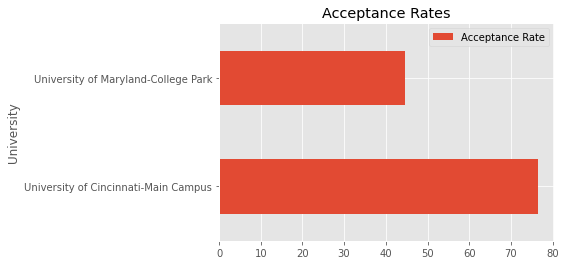

In [895]:
df.plot.barh(x = 'University', y = 'Acceptance Rate', title = 'Acceptance Rates')

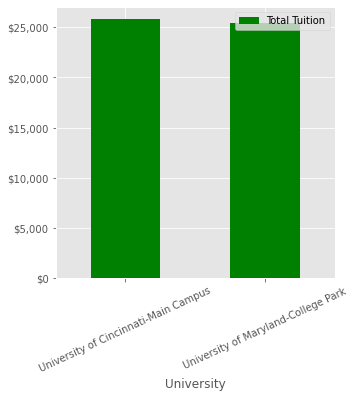

In [896]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
df.plot(kind='bar', y='Total Tuition', x='University',
        align='center', edgecolor='none', 
        color='green', ax=ax)

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 
plt.xticks(rotation=25)

plt.show()

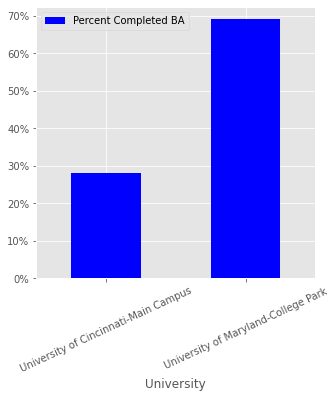

In [897]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
df.plot(kind='bar', y='Percent Completed BA', x='University',
        align='center', edgecolor='none', 
        color='blue', ax=ax)

fmt = '{x:.0f}%'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 
plt.xticks(rotation=25)

plt.show()

In [898]:
# one hot encoding
uconehot = pd.get_dummies(ucvenues[['Categories']], prefix="", prefix_sep="")

uconehot['City'] = ucvenues['City']

fixed_columns = [uconehot.columns[-1]] + list(uconehot.columns[:-1])
uconehot = uconehot[fixed_columns]

uconehot.head()

,City,American Restaurant,Asian Restaurant,Bagel Shop,Bakery,Bank,Bar,Big Box Store,Bookstore,Breakfast Spot,...,Smoke Shop,Smoothie Shop,Soccer Stadium,Sporting Goods Shop,Student Center,Sushi Restaurant,Video Game Store,Wings Joint,Women's Store,Yoga Studio
0,Cincinnati,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Cincinnati,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Cincinnati,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Cincinnati,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,Cincinnati,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [899]:
uconehot.shape

(60, 43)

In [900]:
ucgrouped = uconehot.groupby('City').mean().reset_index()
ucgrouped

,City,American Restaurant,Asian Restaurant,Bagel Shop,Bakery,Bank,Bar,Big Box Store,Bookstore,Breakfast Spot,...,Smoke Shop,Smoothie Shop,Soccer Stadium,Sporting Goods Shop,Student Center,Sushi Restaurant,Video Game Store,Wings Joint,Women's Store,Yoga Studio
0,Cincinnati,0.05,0.016667,0.016667,0.016667,0.05,0.033333,0.016667,0.016667,0.016667,...,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667


In [901]:
ucgrouped.shape

(1, 43)

In [902]:
num_top_venues = 5

for hood in ucgrouped['City']:
    print("----"+hood+"----")
    temp = ucgrouped[ucgrouped['City'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Cincinnati----
                 venue  freq
0       Sandwich Place  0.07
1  American Restaurant  0.05
2                 Bank  0.05
3          Coffee Shop  0.05
4          Pizza Place  0.03




In [903]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [904]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['City']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['City'] = ucgrouped['City']

for ind in np.arange(ucgrouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(ucgrouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Cincinnati,Sandwich Place,American Restaurant,Bank,Coffee Shop,Bar,College Arts Building,Convenience Store,Fast Food Restaurant,Indian Restaurant,Mobile Phone Shop


In [905]:
# set number of clusters
kclusters = 1

ucgrouped_clustering = ucgrouped.drop('City', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(ucgrouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0])

In [906]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

ucmerged = ucvenues

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
ucmerged = ucmerged.join(neighborhoods_venues_sorted.set_index('City'), on='City')

ucmerged.head() # check the last columns!

,City,Name,Categories,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Cincinnati,UC College-Conservatory of Music,College Arts Building,39.129627,-84.517736,0,Sandwich Place,American Restaurant,Bank,Coffee Shop,Bar,College Arts Building,Convenience Store,Fast Food Restaurant,Indian Restaurant,Mobile Phone Shop
1,Cincinnati,BIBIBOP Asian Grill,Asian Restaurant,39.128441,-84.516380,0,Sandwich Place,American Restaurant,Bank,Coffee Shop,Bar,College Arts Building,Convenience Store,Fast Food Restaurant,Indian Restaurant,Mobile Phone Shop
2,Cincinnati,Catskeller,Bar,39.131769,-84.517261,0,Sandwich Place,American Restaurant,Bank,Coffee Shop,Bar,College Arts Building,Convenience Store,Fast Food Restaurant,Indian Restaurant,Mobile Phone Shop
3,Cincinnati,Yoga Alive Clifton,Yoga Studio,39.128359,-84.515539,0,Sandwich Place,American Restaurant,Bank,Coffee Shop,Bar,College Arts Building,Convenience Store,Fast Food Restaurant,Indian Restaurant,Mobile Phone Shop
4,Cincinnati,Marge Schott Stadium,College Baseball Diamond,39.129708,-84.513286,0,Sandwich Place,American Restaurant,Bank,Coffee Shop,Bar,College Arts Building,Convenience Store,Fast Food Restaurant,Indian Restaurant,Mobile Phone Shop


In [1064]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=15)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
#colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
#rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(ucmerged['Latitude'], ucmerged['Longitude'], ucmerged['City'], ucmerged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        #color=rainbow[cluster-1],
        fill=True,
        #fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [923]:
# one hot encoding
umdonehot = pd.get_dummies(umdvenues[['Categories']], prefix="", prefix_sep="")

umdonehot['City'] = umdvenues['City']

fixed_columns = [umdonehot.columns[-1]] + list(umdonehot.columns[:-1])
umdonehot = umdonehot[fixed_columns]

umdonehot.head()

,City,American Restaurant,Auto Workshop,Bookstore,Bowling Alley,Café,Chinese Restaurant,Coffee Shop,Fast Food Restaurant,Grocery Store,...,Gym / Fitness Center,Ice Cream Shop,Performing Arts Venue,Pizza Place,Pool,Salad Place,Sandwich Place,Sculpture Garden,Student Center,Tennis Court
0,College Park,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,College Park,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,College Park,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,College Park,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,College Park,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [924]:
umdonehot.shape

(23, 21)

In [925]:
umdgrouped = umdonehot.groupby('City').mean().reset_index()
umdgrouped

,City,American Restaurant,Auto Workshop,Bookstore,Bowling Alley,Café,Chinese Restaurant,Coffee Shop,Fast Food Restaurant,Grocery Store,...,Gym / Fitness Center,Ice Cream Shop,Performing Arts Venue,Pizza Place,Pool,Salad Place,Sandwich Place,Sculpture Garden,Student Center,Tennis Court
0,College Park,0.086957,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.130435,0.043478,...,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478


In [926]:
umdgrouped.shape

(1, 21)

In [927]:
num_top_venues = 5

for hood in umdgrouped['City']:
    print("----"+hood+"----")
    temp = umdgrouped[umdgrouped['City'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----College Park----
                  venue  freq
0  Fast Food Restaurant  0.13
1   American Restaurant  0.09
2        Ice Cream Shop  0.04
3        Student Center  0.04
4      Sculpture Garden  0.04




In [937]:
umdnum_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['City']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
umdneighborhoods_venues_sorted = pd.DataFrame(columns=columns)
umdneighborhoods_venues_sorted['City'] = umdgrouped['City']

for ind in np.arange(ucgrouped.shape[0]):
    umdneighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(umdgrouped.iloc[ind, :], umdnum_top_venues)

umdneighborhoods_venues_sorted.head()

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,College Park,Fast Food Restaurant,American Restaurant,Student Center,Auto Workshop,Bookstore,Bowling Alley,Café,Chinese Restaurant,Coffee Shop,Grocery Store


In [938]:
# set number of clusters
kclusters = 1

umdgrouped_clustering = umdgrouped.drop('City', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(umdgrouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0])

In [939]:
# add clustering labels
umdneighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

umdmerged = umdvenues

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
umdmerged = umdmerged.join(umdneighborhoods_venues_sorted.set_index('City'), on='City')

umdmerged.head() # check the last columns!

,City,Name,Categories,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,College Park,Eppley Recreation Center Gym,Gym,38.993489,-76.944991,0,Fast Food Restaurant,American Restaurant,Student Center,Auto Workshop,Bookstore,Bowling Alley,Café,Chinese Restaurant,Coffee Shop,Grocery Store
1,College Park,Eppley Recreation Center Natatorium,Gym / Fitness Center,38.993421,-76.944778,0,Fast Food Restaurant,American Restaurant,Student Center,Auto Workshop,Bookstore,Bowling Alley,Café,Chinese Restaurant,Coffee Shop,Grocery Store
2,College Park,The Clarice Smith Performing Arts Center,Performing Arts Venue,38.990816,-76.949810,0,Fast Food Restaurant,American Restaurant,Student Center,Auto Workshop,Bookstore,Bowling Alley,Café,Chinese Restaurant,Coffee Shop,Grocery Store
3,College Park,Adele H Stamp Student Union,Student Center,38.988073,-76.944814,0,Fast Food Restaurant,American Restaurant,Student Center,Auto Workshop,Bookstore,Bowling Alley,Café,Chinese Restaurant,Coffee Shop,Grocery Store
4,College Park,Maryland Food Collective,Grocery Store,38.988504,-76.944706,0,Fast Food Restaurant,American Restaurant,Student Center,Auto Workshop,Bookstore,Bowling Alley,Café,Chinese Restaurant,Coffee Shop,Grocery Store


In [1062]:
# create map
umdmap_clusters = folium.Map(location=[latitude_umd, longitude_umd], zoom_start=15)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
#colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
#rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(umdmerged['Latitude'], umdmerged['Longitude'], umdmerged['City'], umdmerged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        #color=rainbow[cluster-1],
        fill=True,
        #fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(umdmap_clusters)
       
umdmap_clusters

In [972]:
ucCoffee = ucvenues.loc[ucvenues['Categories'] == 'Coffee Shop']

In [973]:
umdCoffee = umdvenues.loc[umdvenues['Categories'] == 'Coffee Shop']

In [974]:
ucCafe = ucvenues.loc[ucvenues['Categories'] == 'Café']

In [975]:
umdCafe = umdvenues.loc[umdvenues['Categories'] == 'Café']

In [1061]:
coffee = pd.concat([ucCoffee, umdCoffee])
coffee = pd.concat([coffee, umdCafe])
coffee = pd.concat([coffee, ucCafe]).reset_index(drop = True)
coffee

,City,Name,Categories,Latitude,Longitude
0,Cincinnati,The 86 Uptown,Coffee Shop,39.133098,-84.510677
1,Cincinnati,Starbucks,Coffee Shop,39.130481,-84.517897
2,Cincinnati,Java City,Coffee Shop,39.134830,-84.513569
3,College Park,Coffee Bar - University of Maryland,Coffee Shop,38.987794,-76.944451
4,College Park,Quantum Cafe,Café,38.990963,-76.941593


In [1065]:
ucmerged.loc[ucmerged['Cluster Labels'] == 0, ucmerged.columns[[1] + list(range(5, ucmerged.shape[1]))]]

,Name,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,UC College-Conservatory of Music,0,Sandwich Place,American Restaurant,Bank,Coffee Shop,Bar,College Arts Building,Convenience Store,Fast Food Restaurant,Indian Restaurant,Mobile Phone Shop
1,BIBIBOP Asian Grill,0,Sandwich Place,American Restaurant,Bank,Coffee Shop,Bar,College Arts Building,Convenience Store,Fast Food Restaurant,Indian Restaurant,Mobile Phone Shop
2,Catskeller,0,Sandwich Place,American Restaurant,Bank,Coffee Shop,Bar,College Arts Building,Convenience Store,Fast Food Restaurant,Indian Restaurant,Mobile Phone Shop
3,Yoga Alive Clifton,0,Sandwich Place,American Restaurant,Bank,Coffee Shop,Bar,College Arts Building,Convenience Store,Fast Food Restaurant,Indian Restaurant,Mobile Phone Shop
4,Marge Schott Stadium,0,Sandwich Place,American Restaurant,Bank,Coffee Shop,Bar,College Arts Building,Convenience Store,Fast Food Restaurant,Indian Restaurant,Mobile Phone Shop
5,Raising Cane's Chicken Fingers,0,Sandwich Place,American Restaurant,Bank,Coffee Shop,Bar,College Arts Building,Convenience Store,Fast Food Restaurant,Indian Restaurant,Mobile Phone Shop
6,Keystone Bar & Grill Clifton,0,Sandwich Place,American Restaurant,Bank,Coffee Shop,Bar,College Arts Building,Convenience Store,Fast Food Restaurant,Indian Restaurant,Mobile Phone Shop
7,Adriatico's New York Style,0,Sandwich Place,American Restaurant,Bank,Coffee Shop,Bar,College Arts Building,Convenience Store,Fast Food Restaurant,Indian Restaurant,Mobile Phone Shop
8,The Brass Tap,0,Sandwich Place,American Restaurant,Bank,Coffee Shop,Bar,College Arts Building,Convenience Store,Fast Food Restaurant,Indian Restaurant,Mobile Phone Shop
9,Panera Bread,0,Sandwich Place,American Restaurant,Bank,Coffee Shop,Bar,College Arts Building,Convenience Store,Fast Food Restaurant,Indian Restaurant,Mobile Phone Shop


In [1068]:
umdmerged.loc[umdmerged['Cluster Labels'] == 0, umdmerged.columns[[1] + list(range(5, umdmerged.shape[1]))]]

,Name,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Eppley Recreation Center Gym,0,Fast Food Restaurant,American Restaurant,Student Center,Auto Workshop,Bookstore,Bowling Alley,Café,Chinese Restaurant,Coffee Shop,Grocery Store
1,Eppley Recreation Center Natatorium,0,Fast Food Restaurant,American Restaurant,Student Center,Auto Workshop,Bookstore,Bowling Alley,Café,Chinese Restaurant,Coffee Shop,Grocery Store
2,The Clarice Smith Performing Arts Center,0,Fast Food Restaurant,American Restaurant,Student Center,Auto Workshop,Bookstore,Bowling Alley,Café,Chinese Restaurant,Coffee Shop,Grocery Store
3,Adele H Stamp Student Union,0,Fast Food Restaurant,American Restaurant,Student Center,Auto Workshop,Bookstore,Bowling Alley,Café,Chinese Restaurant,Coffee Shop,Grocery Store
4,Maryland Food Collective,0,Fast Food Restaurant,American Restaurant,Student Center,Auto Workshop,Bookstore,Bowling Alley,Café,Chinese Restaurant,Coffee Shop,Grocery Store
5,Barnes & Noble,0,Fast Food Restaurant,American Restaurant,Student Center,Auto Workshop,Bookstore,Bowling Alley,Café,Chinese Restaurant,Coffee Shop,Grocery Store
6,Chick-fil-A,0,Fast Food Restaurant,American Restaurant,Student Center,Auto Workshop,Bookstore,Bowling Alley,Café,Chinese Restaurant,Coffee Shop,Grocery Store
7,Jim Henson Statue,0,Fast Food Restaurant,American Restaurant,Student Center,Auto Workshop,Bookstore,Bowling Alley,Café,Chinese Restaurant,Coffee Shop,Grocery Store
8,Panda Express,0,Fast Food Restaurant,American Restaurant,Student Center,Auto Workshop,Bookstore,Bowling Alley,Café,Chinese Restaurant,Coffee Shop,Grocery Store
9,Coffee Bar - University of Maryland,0,Fast Food Restaurant,American Restaurant,Student Center,Auto Workshop,Bookstore,Bowling Alley,Café,Chinese Restaurant,Coffee Shop,Grocery Store
